<h3> <b> Import Qiskit Libraries </b> </h3>

In [1]:
%matplotlib inline
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *

# Loading your IBM Q account(s)
provider = IBMQ.load_account()

<h3> <b> Build the Cluster State Quantum Circuit </b> </h3> 
<ul>
    <li> Maximally Entangled Qubit Network </li>
    <li> Utilizes: </li>
    <ul>
        <li> Hadamard (H) gates for superposition of states </li>
        <li> Controlled-NOT (CNOT) gates for entanglement </li>
        <li> Pauli-Y (Y) gates for phase alteration and rotation of qubits about y-axis </li> 
    </ul>
</ul>

In [2]:
# Function: Creates Controlled-NOT Gates (CNOT) and Barriers for aesthetics 
# Parameters: 'circuit', 'channels'
#     'circuit' : quantum circuit 
#    'channels' : number of active states in circuit (generally same as 'numIn')
def CNOT_and_Barriers(circuit, channels):
    for channel in range(channels-1):
        circuit.cx(channel, channel+1)
        for count in range(channel):
            circuit.barrier(count)

In [10]:
def clusterStateQC(numIn, numOut):
    # Define Cluster State Quantum Circuit (abbreviated: cs_qc) 
    # numIn = number of initial quantum states 
    # numOut = number of output states of cs_qc (likely same as numIn)
    cs_qc = QuantumCircuit(numIn, numOut)
    
    # For testing this circuit, we can reset all inputs to this circuit to 0. 
    # Ideally, the CtoQ encoder code will encode classical data to initial quantum states as inputs to this circuit. 
    #for i in range(numIn):
    #    cs_qc.reset(i)
    
    # Hadamard Gates for all incoming feature inputs to achieve superposition of states
    for i in range(numIn):
        cs_qc.h(i)
        
    # Place Controlled-NOT Gates (CNOT) for entanglement and barriers for aesthetics
    CNOT_and_Barriers(cs_qc, numIn)
    
    # Place Pauli-Y Gates (Y) for rotation of states about y-axis 
    for i in range(numIn):
        cs_qc.y(i)
    
    # Place Controlled-NOT Gates (CNOT) for entanglement and barriers for aesthetics
    CNOT_and_Barriers(cs_qc, numIn)  
    
    # For testing this circuit, we can measure the outputs
    # We should expect to see that the probabilities for the outputs of the circuit vary each time we re-execute the simulation. 
    #for i in range(numOut):
    #    cs_qc.measure(i,i)
    
    return cs_qc

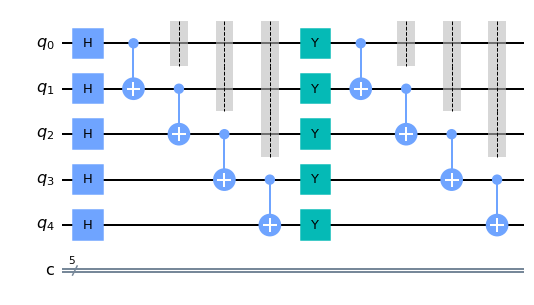

In [11]:
initialQC = clusterStateQC(numIn=5, numOut=5)
initialQC.draw()

<h3> QASM Simulator to test circuit </h3>

Note that we can get the probabilities histogram if we measure the output of the circuit. 

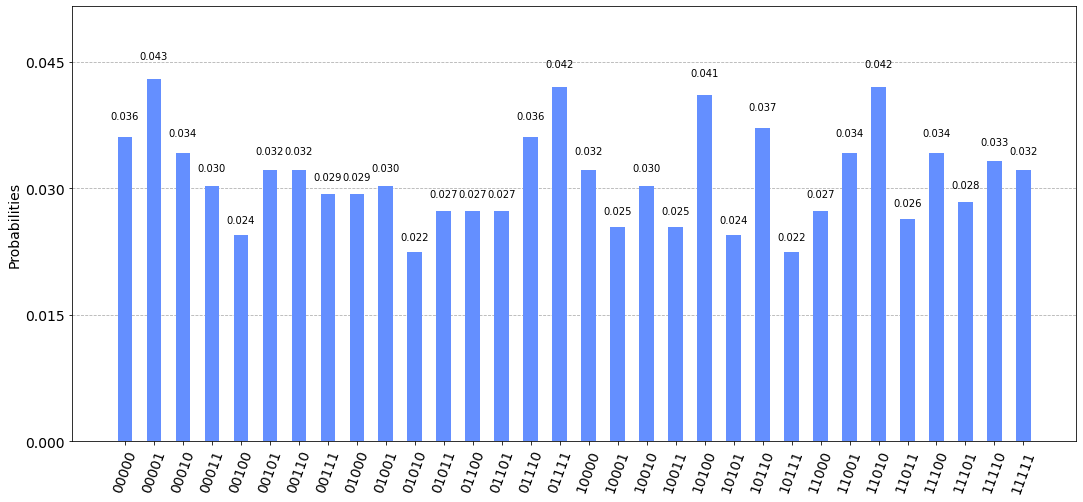

In [9]:
sim = Aer.get_backend('qasm_simulator')  # this is the simulator we'll use
qobj = assemble(initialQC)  # this turns the circuit into an object our backend can run
result = sim.run(qobj).result()  # we run the experiment and get the result from that experiment
# from the results, we get a dictionary containing the number of times (counts)
# each result appeared
counts = result.get_counts()
# and display it on a histogram
plot_histogram(counts, figsize=(18, 8))